In [19]:
import numpy as np # linear algebra


In [20]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)




In [21]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))




plt.style.use('seaborn-v0_8-darkgrid')
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
sns.set_palette("viridis")

DATASET OVERVIEW
Dataset Shape: (1100, 21)
Total Records: 1100
Total Features: 21

Column Names:
['anxiety_level', 'self_esteem', 'mental_health_history', 'depression', 'headache', 'blood_pressure', 'sleep_quality', 'breathing_problem', 'noise_level', 'living_conditions', 'safety', 'basic_needs', 'academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns', 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying', 'stress_level']

First 5 rows of the dataset:
   anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_press

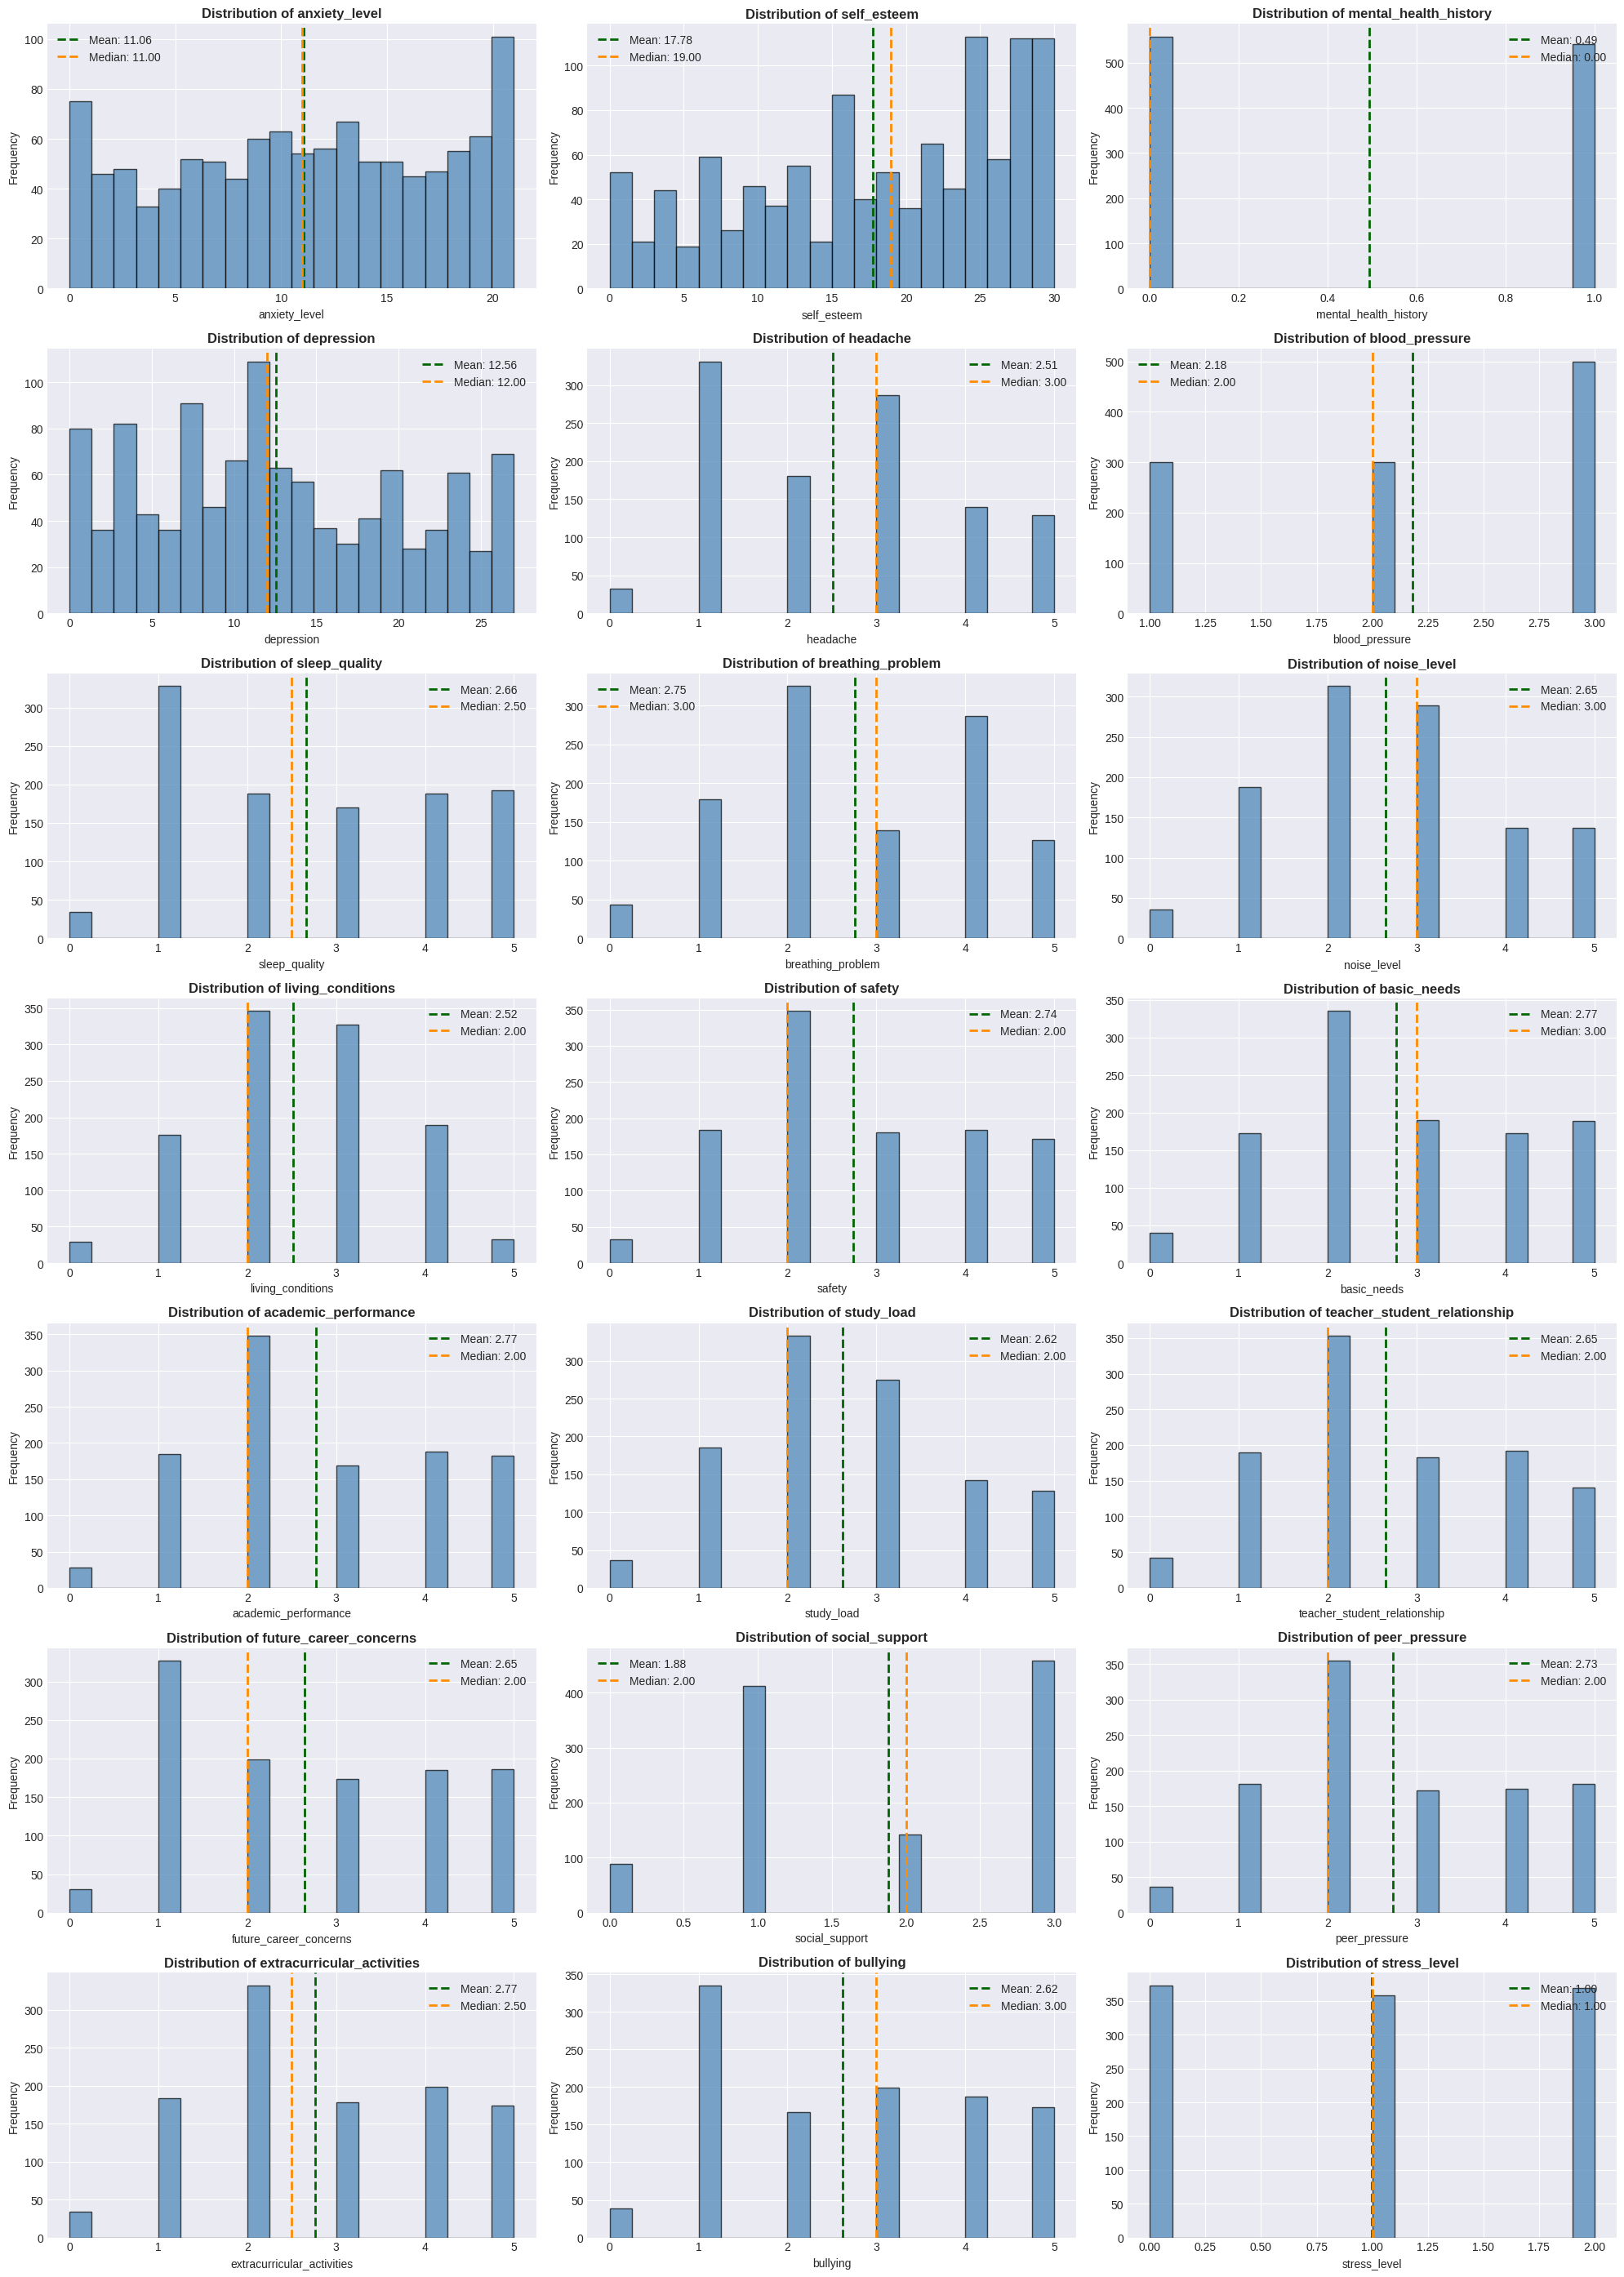


Skewness of Features:
headache                        0.270494
study_load                      0.228964
depression                      0.216638
noise_level                     0.207122
future_career_concerns          0.204276
teacher_student_relationship    0.198016
peer_pressure                   0.194719
safety                          0.188097
academic_performance            0.184316
sleep_quality                   0.177975
bullying                        0.175348
basic_needs                     0.135859
extracurricular_activities      0.135604
mental_health_history           0.029134
living_conditions               0.018794
stress_level                    0.006728
breathing_problem              -0.001625
anxiety_level                  -0.082612
social_support                 -0.180958
blood_pressure                 -0.351186
self_esteem                    -0.396539
dtype: float64

TARGET VARIABLE ANALYSIS (stress_level)


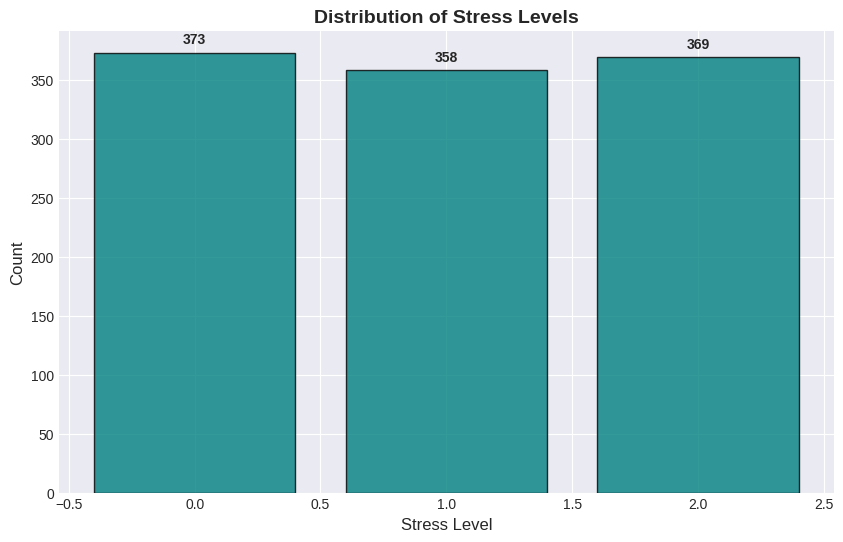


Stress Level Value Counts:
stress_level
0    373
1    358
2    369
Name: count, dtype: int64

Percentage Distribution:
stress_level
0    33.91
1    32.55
2    33.55
Name: count, dtype: float64

CORRELATION ANALYSIS


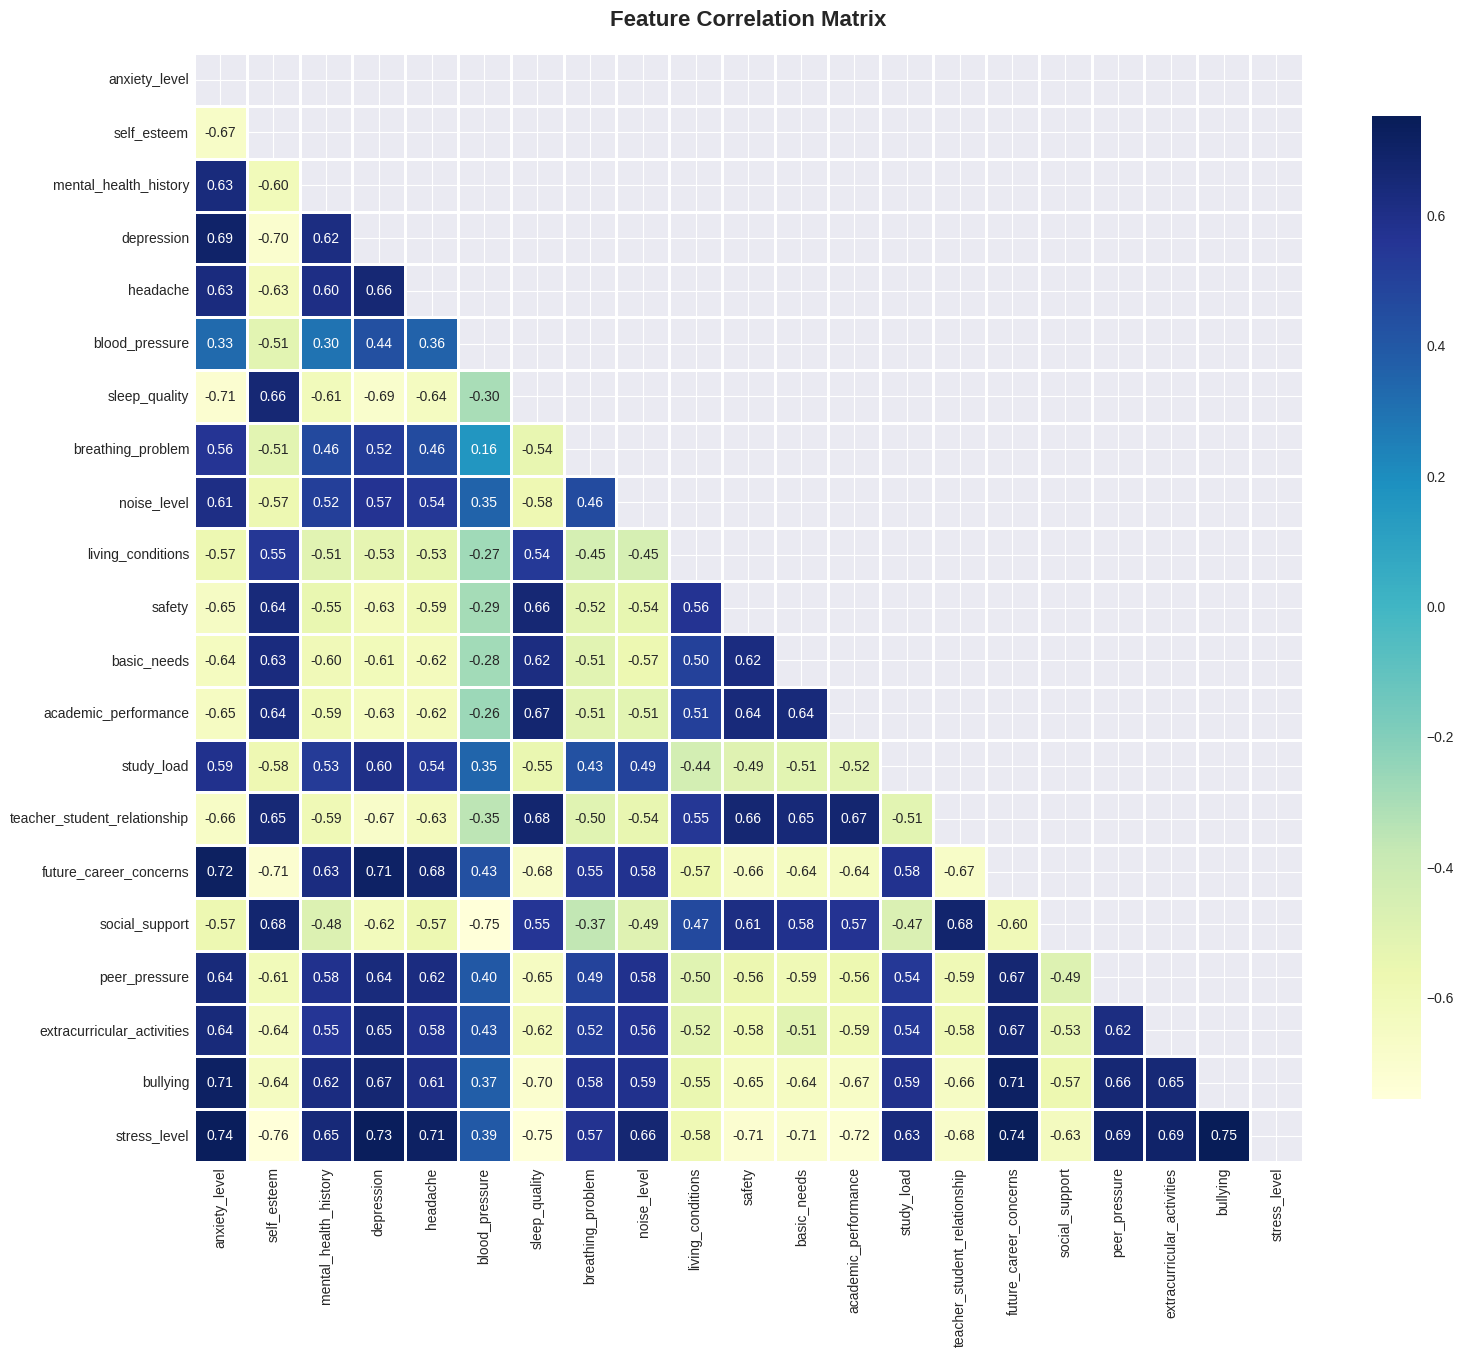


Top 10 Features Correlated with Stress Level:
bullying                      0.751162
future_career_concerns        0.742619
anxiety_level                 0.736795
depression                    0.734379
headache                      0.713484
extracurricular_activities    0.692977
peer_pressure                 0.690684
noise_level                   0.663371
mental_health_history         0.648644
study_load                    0.634156
Name: stress_level, dtype: float64

Bottom 10 Features Correlated with Stress Level:
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64


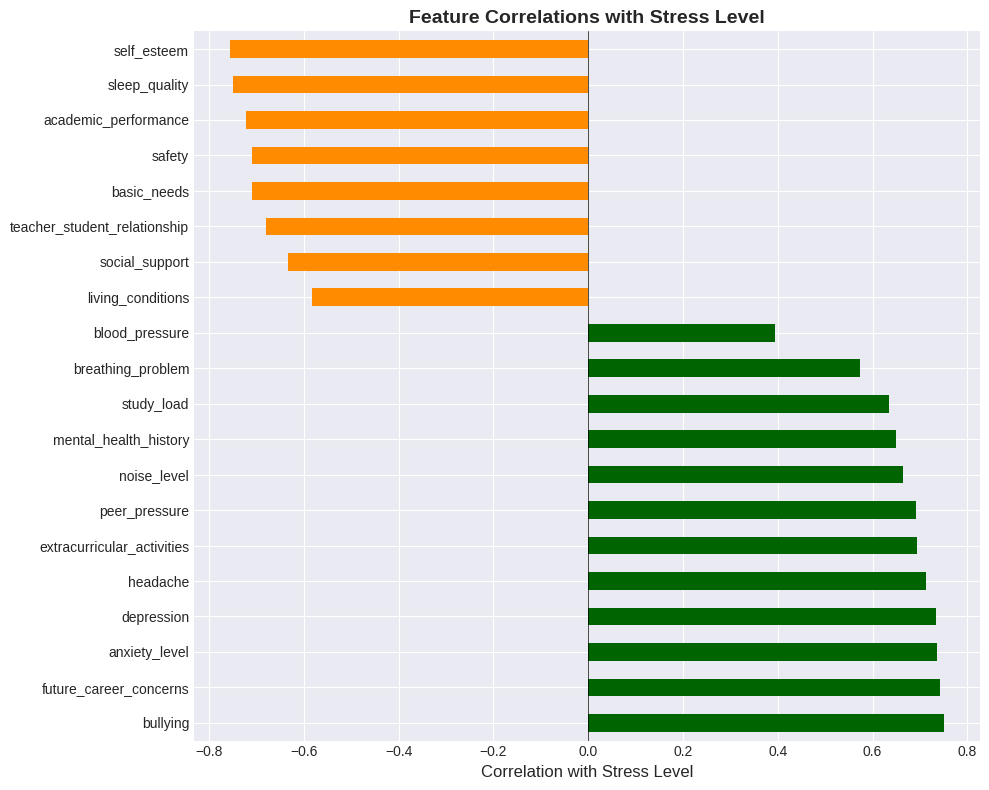


MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
                 Feature 1               Feature 2  Correlation
16                bullying            stress_level     0.751162
15  future_career_concerns            stress_level     0.742619
3            anxiety_level            stress_level     0.736795
7               depression            stress_level     0.734379
1            anxiety_level  future_career_concerns     0.717016
8                 headache            stress_level     0.713484
14  future_career_concerns                bullying     0.711278
2            anxiety_level                bullying     0.709982
6               depression  future_career_concerns     0.706561
12             basic_needs            stress_level    -0.708968
11                  safety            stress_level    -0.709602
0            anxiety_level           sleep_quality    -0.710292
4              self_esteem  future_career_concerns    -0.712520
13    academic_perf

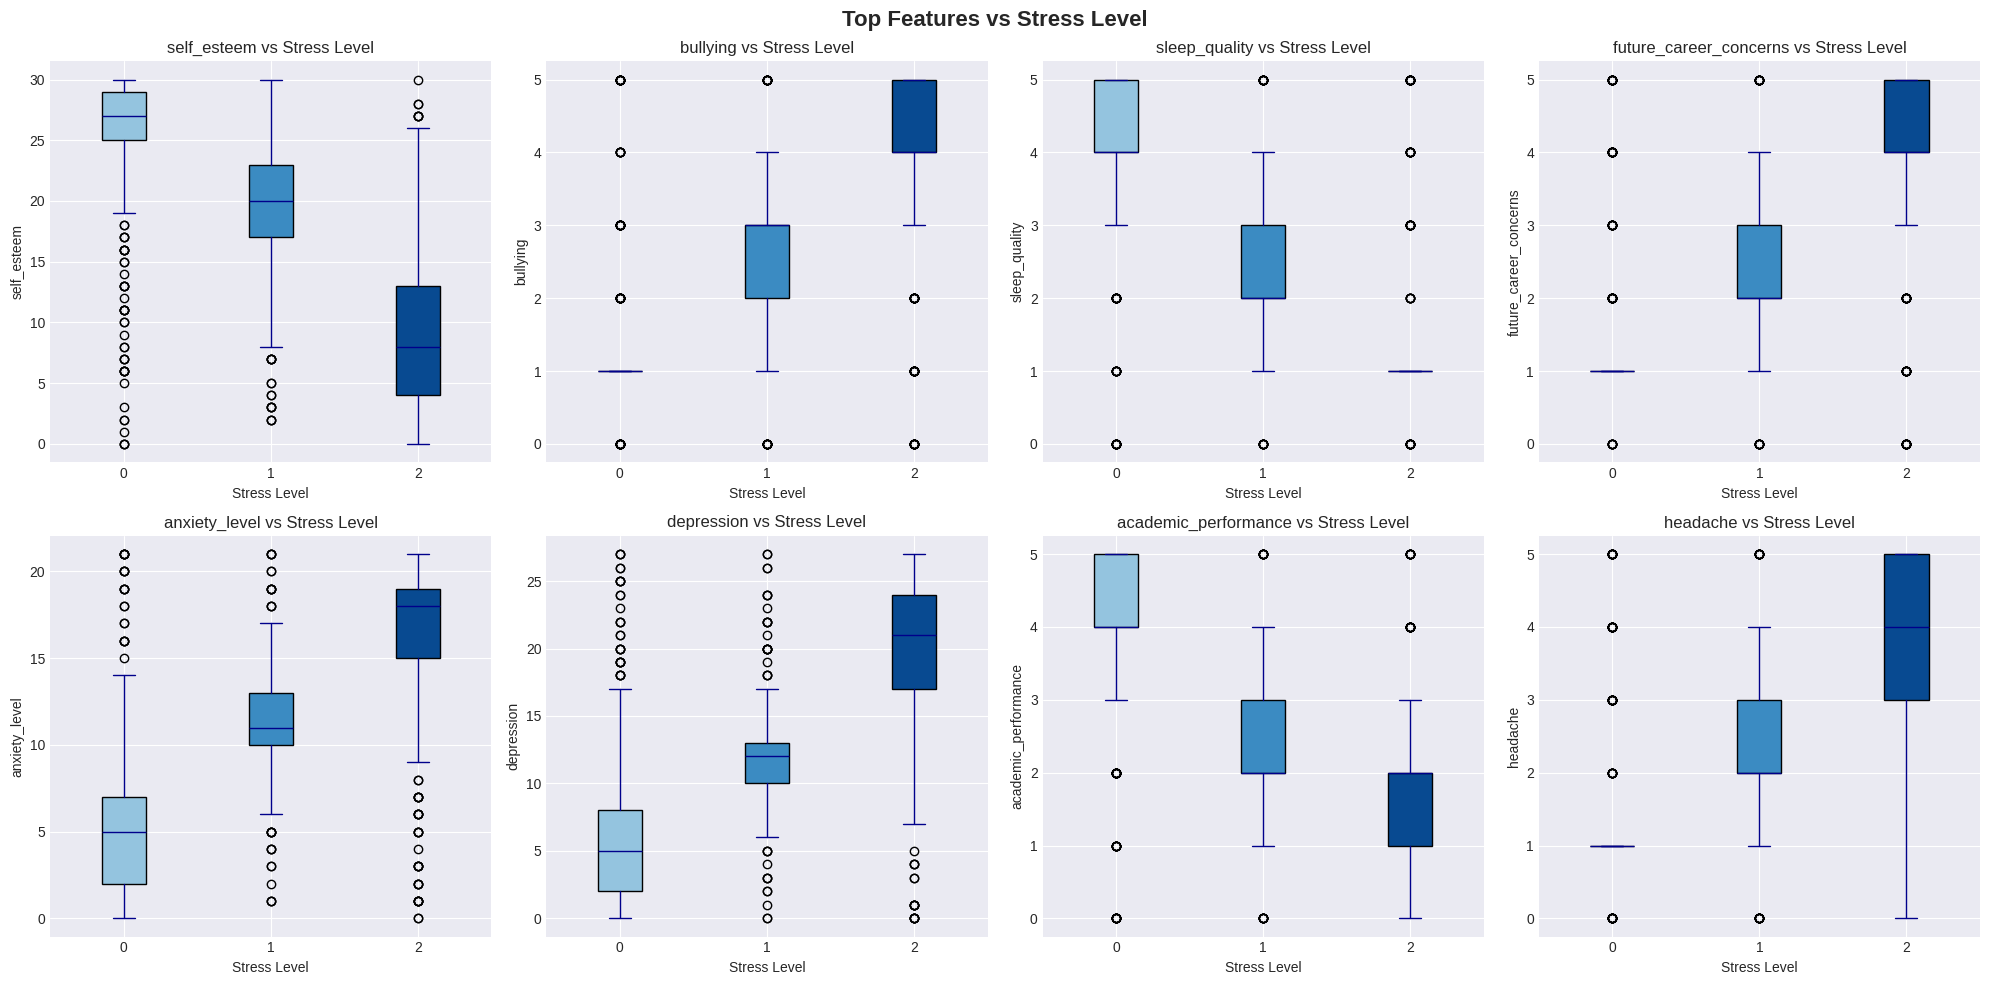


OUTLIER DETECTION

Outlier Summary (IQR Method):
                   count  percentage
noise_level        173.0   15.727273
study_load         165.0   15.000000
living_conditions   62.0    5.636364


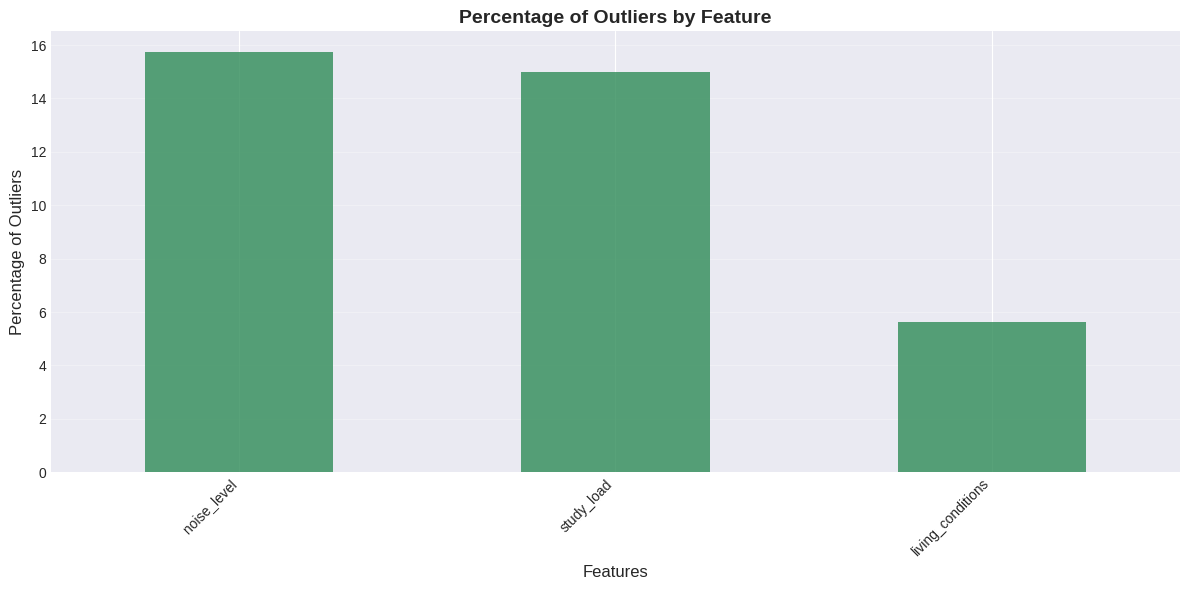


FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                         Feature  MI Score
5                 blood_pressure  0.757233
6                  sleep_quality  0.678559
15        future_career_concerns  0.676649
3                     depression  0.663099
0                  anxiety_level  0.635312
19                      bullying  0.625204
1                    self_esteem  0.601443
4                       headache  0.581823
12          academic_performance  0.547959
14  teacher_student_relationship  0.539078
16                social_support  0.529902
10                        safety  0.524940
11                   basic_needs  0.522586
18    extracurricular_activities  0.519117
17                 peer_pressure  0.495004
8                    noise_level  0.428170
9              living_conditions  0.413704
13                    study_load  0.412941
7              breathing_problem  0.338456
2          mental_health_history  0.243735


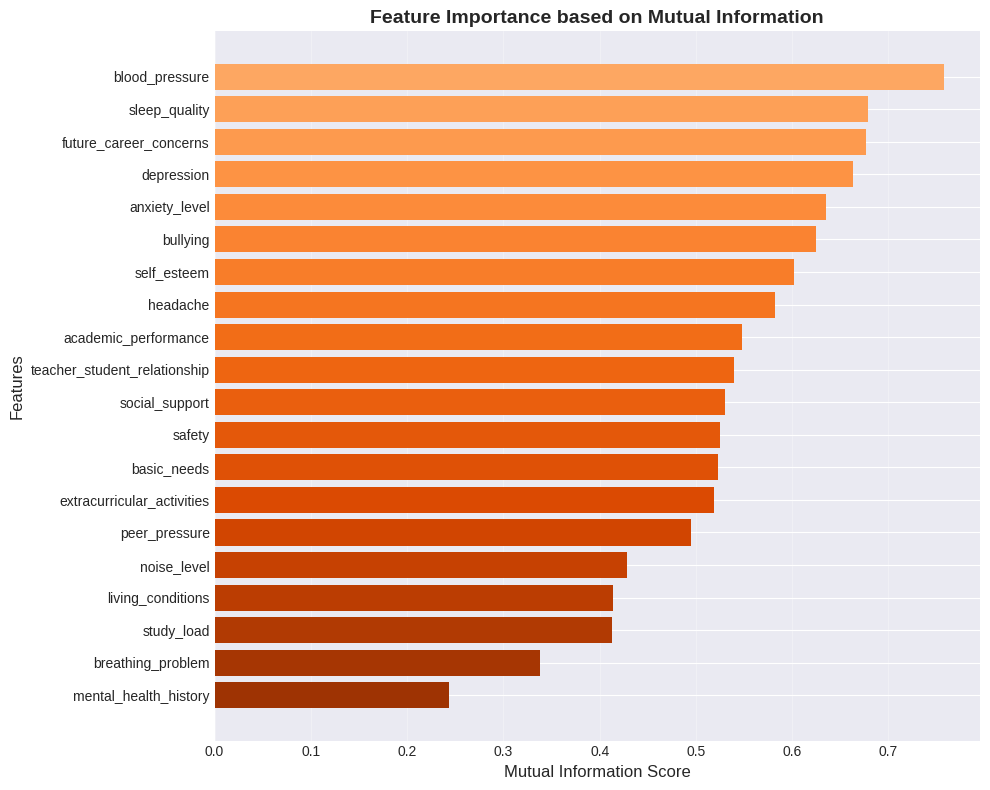


DIMENSIONALITY REDUCTION (PCA)


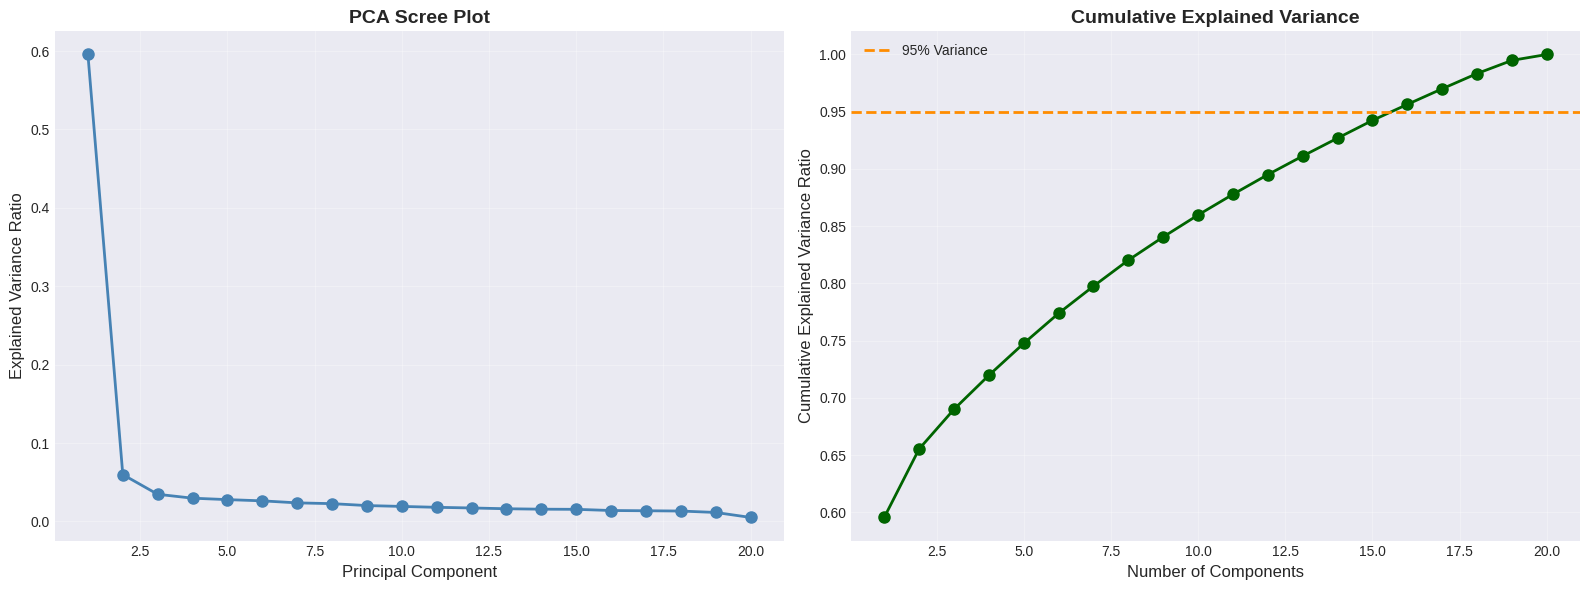


Number of components needed for 95% variance: 16

STATISTICAL TESTS

Normality Test for Stress Level:
Statistic: 7361.7179
P-value: 0.0000
Is normally distributed? No

ANOVA Tests (Feature groups by stress level):

anxiety_level:
  F-statistic: 655.4532
  P-value: 0.0000
  Significant difference? Yes

depression:
  F-statistic: 652.6293
  P-value: 0.0000
  Significant difference? Yes

academic_performance:
  F-statistic: 639.2229
  P-value: 0.0000
  Significant difference? Yes

RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE SCALING:
   - All features are on similar scales (mostly 0-5 range)
   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale
   - Tree-based models may not require scaling

2. HANDLING MULTICOLLINEARITY:
   - Consider removing one feature from highly correlated pairs
   - Or use dimensionality reduction techniques (PCA, LDA)

3. OUTLIER TREATMENT:
   - Consider capping outliers or using robust scaling
   - Tree-based models are generally 

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.model_selection import train_test_split


plt.style.use('seaborn-v0_8-darkgrid')
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
sns.set_palette("viridis")

# Check if the file exists and list directory contents
file_path = "StressLevelDataset.csv"
if not os.path.exists(file_path):
    print(f"Error: The file '{file_path}' was not found.")
    print("Listing files in the current directory:")
    for root, dirs, files in os.walk("."):
        print(f"Directory: {root}")
        for name in files:
            print(os.path.join(root, name))
else:
    df = pd.read_csv(file_path)

    print("=" * 80)
    print("DATASET OVERVIEW")
    print("=" * 80)
    print(f"Dataset Shape: {df.shape}")
    print(f"Total Records: {df.shape[0]}")
    print(f"Total Features: {df.shape[1]}")
    print("\nColumn Names:")
    print(df.columns.tolist())

    print("\nFirst 5 rows of the dataset:")
    print(df.head())


    print("\n" + "=" * 80)
    print("DATA QUALITY ASSESSMENT")
    print("=" * 80)

    print("\nData Types:")
    print(df.dtypes)

    print("\nMissing Values:")
    missing_values = df.isnull().sum()
    if missing_values.sum() == 0:
        print("No missing values found in the dataset!")
    else:
        print(missing_values[missing_values > 0])

    duplicates = df.duplicated().sum()
    print(f"\nDuplicate Rows: {duplicates}")

    print("\nBasic Statistics:")
    print(df.describe())


    print("\n" + "=" * 80)
    print("UNIVARIATE ANALYSIS")
    print("=" * 80)

    fig, axes = plt.subplots(7, 3, figsize=(20, 28))
    axes = axes.ravel()

    for idx, col in enumerate(df.columns):
        axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7, color='steelblue')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

        mean_val = df[col].mean()
        median_val = df[col].median()
        axes[idx].axvline(mean_val, color='darkgreen', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        axes[idx].axvline(median_val, color='darkorange', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        axes[idx].legend()

    plt.tight_layout()
    plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nSkewness of Features:")
    skewness = df.skew()
    print(skewness.sort_values(ascending=False))


    print("\n" + "=" * 80)
    print("TARGET VARIABLE ANALYSIS (stress_level)")
    print("=" * 80)

    plt.figure(figsize=(10, 6))
    stress_counts = df['stress_level'].value_counts().sort_index()
    bars = plt.bar(stress_counts.index, stress_counts.values, edgecolor='black', color='teal', alpha=0.8)
    plt.xlabel('Stress Level', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Distribution of Stress Levels', fontsize=14, fontweight='bold')
    for i, v in enumerate(stress_counts.values):
        plt.text(stress_counts.index[i], v + 5, str(v), ha='center', va='bottom', fontweight='bold')
    plt.savefig('stress_level_distribution.png', dpi=300, bbox_inches='tight')
    plt.show()

    print("\nStress Level Value Counts:")
    print(stress_counts)
    print(f"\nPercentage Distribution:")
    print((stress_counts / len(df) * 100).round(2))


    print("\n" + "=" * 80)
    print("CORRELATION ANALYSIS")
    print("=" * 80)

    correlation_matrix = df.corr()

    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f',
                cmap='YlGnBu', center=0, square=True, linewidths=1,
                cbar_kws={"shrink": .8})
    plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    stress_correlations = correlation_matrix['stress_level'].drop('stress_level').sort_values(ascending=False)
    print("\nTop 10 Features Correlated with Stress Level:")
    print(stress_correlations.head(10))
    print("\nBottom 10 Features Correlated with Stress Level:")
    print(stress_correlations.tail(10))

    plt.figure(figsize=(10, 8))
    colors = ['darkgreen' if x > 0 else 'darkorange' for x in stress_correlations]
    stress_correlations.plot(kind='barh', color=colors)
    plt.xlabel('Correlation with Stress Level', fontsize=12)
    plt.title('Feature Correlations with Stress Level', fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('stress_correlations.png', dpi=300, bbox_inches='tight')
    plt.show()


    print("\n" + "=" * 80)
    print("MULTICOLLINEARITY DETECTION")
    print("=" * 80)

    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
                high_corr_pairs.append({
                    'Feature 1': correlation_matrix.columns[i],
                    'Feature 2': correlation_matrix.columns[j],
                    'Correlation': correlation_matrix.iloc[i, j]
                })

    if high_corr_pairs:
        high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
        print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
        print(high_corr_df)
    else:
        print("\nNo highly correlated feature pairs found (threshold: 0.7)")


    print("\n" + "=" * 80)
    print("BIVARIATE ANALYSIS")
    print("=" * 80)

    top_features = stress_correlations.abs().nlargest(8).index.tolist()

    fig, axes = plt.subplots(2, 4, figsize=(20, 10))
    axes = axes.ravel()

    for idx, feature in enumerate(top_features):
        data_to_plot = [df[df['stress_level'] == level][feature].values
                        for level in sorted(df['stress_level'].unique())]

        bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

        colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)

        for element in ['whiskers', 'fliers', 'medians', 'caps']:
            plt.setp(bp[element], color='darkblue')

        axes[idx].set_title(f'{feature} vs Stress Level', fontsize=12)
        axes[idx].set_xlabel('Stress Level')
        axes[idx].set_ylabel(feature)
        axes[idx].set_xticklabels(sorted(df['stress_level'].unique()))

    plt.suptitle('Top Features vs Stress Level', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig('feature_vs_stress_boxplots.png', dpi=300, bbox_inches='tight')
    plt.show()


    print("\n" + "=" * 80)
    print("OUTLIER DETECTION")
    print("=" * 80)

    outlier_summary = {}
    for col in df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        outlier_summary[col] = {
            'count': len(outliers),
            'percentage': (len(outliers) / len(df)) * 100
        }

    outlier_df = pd.DataFrame(outlier_summary).T
    outlier_df = outlier_df.sort_values('count', ascending=False)
    print("\nOutlier Summary (IQR Method):")
    print(outlier_df[outlier_df['count'] > 0])

    plt.figure(figsize=(12, 6))
    outlier_df[outlier_df['count'] > 0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
    plt.xlabel('Features', fontsize=12)
    plt.ylabel('Percentage of Outliers', fontsize=12)
    plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
    plt.show()


    print("\n" + "=" * 80)
    print("FEATURE IMPORTANCE ANALYSIS")
    print("=" * 80)

    X = df.drop('stress_level', axis=1)
    y = df['stress_level']

    mi_scores = mutual_info_regression(X, y, random_state=42)
    mi_scores_df = pd.DataFrame({
        'Feature': X.columns,
        'MI Score': mi_scores
    }).sort_values('MI Score', ascending=False)

    print("\nMutual Information Scores:")
    print(mi_scores_df)

    plt.figure(figsize=(10, 8))
    colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
    plt.barh(mi_scores_df['Feature'], mi_scores_df['MI Score'], color=colors)
    plt.xlabel('Mutual Information Score', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.title('Feature Importance based on Mutual Information', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.savefig('mutual_information_scores.png', dpi=300, bbox_inches='tight')
    plt.show()


    print("\n" + "=" * 80)
    print("DIMENSIONALITY REDUCTION (PCA)")
    print("=" * 80)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'o-',
             color='steelblue', markersize=8, linewidth=2)
    ax1.set_xlabel('Principal Component', fontsize=12)
    ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
    ax1.set_title('PCA Scree Plot', fontsize=14, fontweight='bold')
    ax1.grid(True, alpha=0.3)

    ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'o-',
             color='darkgreen', markersize=8, linewidth=2)
    ax2.axhline(y=0.95, color='darkorange', linestyle='--', linewidth=2, label='95% Variance')
    ax2.set_xlabel('Number of Components', fontsize=12)
    ax2.set_ylabel('Cumulative Explained Variance Ratio', fontsize=12)
    ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('pca_analysis.png', dpi=300, bbox_inches='tight')
    plt.show()

    n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
    print(f"\nNumber of components needed for 95% variance: {n_components_95}")


    print("\n" + "=" * 80)
    print("STATISTICAL TESTS")
    print("=" * 80)

    statistic, p_value = stats.normaltest(df['stress_level'])
    print(f"\nNormality Test for Stress Level:")
    print(f"Statistic: {statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Is normally distributed? {'Yes' if p_value > 0.05 else 'No'}")

    print("\nANOVA Tests (Feature groups by stress level):")
    for feature in ['anxiety_level', 'depression', 'academic_performance']:
        groups = [group[feature].values for name, group in df.groupby('stress_level')]
        f_stat, p_val = stats.f_oneway(*groups)
        print(f"\n{feature}:")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value: {p_val:.4f}")
        print(f"  Significant difference? {'Yes' if p_val < 0.05 else 'No'}")


    print("\n" + "=" * 80)
    print("RECOMMENDATIONS FOR ML PREPROCESSING")
    print("=" * 80)

    print("\n1. FEATURE SCALING:")
    print("   - All features are on similar scales (mostly 0-5 range)")
    print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
    print("   - Tree-based models may not require scaling")

    print("\n2. HANDLING MULTICOLLINEARITY:")
    if high_corr_pairs:
        print("   - Consider removing one feature from highly correlated pairs")
        print("   - Or use dimensionality reduction techniques (PCA, LDA)")
    else:
        print("   - No severe multicollinearity detected")

    print("\n3. OUTLIER TREATMENT:")
    if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
        print("   - Consider capping outliers or using robust scaling")
        print("   - Tree-based models are generally robust to outliers")
    else:
        print("   - Minimal outliers detected")

    print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
    print("   - Create interaction features between highly correlated variables")
    print("   - Consider polynomial features for non-linear relationships")
    print("   - Group similar features (e.g., physical symptoms, academic factors)")

    print("\n5. CLASS IMBALANCE:")
    stress_dist = df['stress_level'].value_counts(normalize=True)
    if stress_dist.min() < 0.1:
        print("   - Consider using SMOTE or class weights for imbalanced classes")
    else:
        print("   - Classes are reasonably balanced")

    print("\n6. FEATURE SELECTION:")
    print("   - Use mutual information scores for initial feature selection")
    print("   - Consider recursive feature elimination with cross-validation")
    print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")


    summary_report = f"""
STRESS LEVEL DATASET ANALYSIS SUMMARY
=====================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- No Missing Values: {missing_values.sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution:
{stress_counts.to_dict()}

Top 5 Features Correlated with Stress Level:
{stress_correlations.head(5).to_dict()}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5).to_dict()}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5])}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features
3. Handle multicollinearity if needed
4. Consider ensemble methods for robustness
"""

    X = df.drop('stress_level', axis=1)
    y = df['stress_level']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


    with open('stress_survey_analysis_summary.txt', 'w') as f:
        f.write(summary_report)

    print("\n" + "=" * 80)
    print("ANALYSIS COMPLETE!")
    print("=" * 80)
    print("\nFiles saved:")
    print("- feature_distributions.png")
    # Removed stress_experience_distribution.png and stress_types_distribution.png as they are not generated
    print("- correlation_matrix.png")
    print("- stress_correlations.png")
    print("- feature_vs_stress_boxplots.png")
    print("- outlier_percentages.png")
    print("- mutual_information_scores.png")
    print("- pca_analysis.png")
    print("- stress_survey_analysis_summary.txt")
    print("\nReady for ML modeling!")

In [23]:
df = pd.read_csv('StressLevelDataset.csv')

X = df.drop(columns=["stress_level"])
y = df["stress_level"]



In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


with open('stress_survey_analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- feature_distributions.png")
print("- stress_experience_distribution.png")
print("- stress_types_distribution.png")
print("- correlation_matrix.png")
print("- stress_correlations.png")
print("- feature_vs_stress_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- stress_survey_analysis_summary.txt")
print("\nReady for ML modeling!")


ANALYSIS COMPLETE!

Files saved:
- feature_distributions.png
- stress_experience_distribution.png
- stress_types_distribution.png
- correlation_matrix.png
- stress_correlations.png
- feature_vs_stress_boxplots.png
- outlier_percentages.png
- mutual_information_scores.png
- pca_analysis.png
- stress_survey_analysis_summary.txt

Ready for ML modeling!


In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)



In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)




In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [29]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [30]:
from sklearn.linear_model import LogisticRegression


In [31]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier


In [32]:
from xgboost import XGBClassifier


In [33]:
from lightgbm import LGBMClassifier


In [34]:
from sklearn.svm import SVC



In [35]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42)
}



In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [38]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Comparison ===")
print(results_df)


Logistic Regression Results:
Accuracy: 0.8763636363636363
Confusion Matrix:
 [[79  6  8]
 [ 4 82  4]
 [ 9  3 80]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85        93
           1       0.90      0.91      0.91        90
           2       0.87      0.87      0.87        92

    accuracy                           0.88       275
   macro avg       0.88      0.88      0.88       275
weighted avg       0.88      0.88      0.88       275


Random Forest Results:
Accuracy: 0.8727272727272727
Confusion Matrix:
 [[79  5  9]
 [ 5 80  5]
 [ 6  5 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        93
           1       0.89      0.89      0.89        90
           2       0.85      0.88      0.87        92

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [18:26:52] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



XGBoost Results:
Accuracy: 0.8472727272727273
Confusion Matrix:
 [[79  6  8]
 [ 5 77  8]
 [11  4 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84        93
           1       0.89      0.86      0.87        90
           2       0.83      0.84      0.83        92

    accuracy                           0.85       275
   macro avg       0.85      0.85      0.85       275
weighted avg       0.85      0.85      0.85       275

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 194
[LightGBM] [Info] Number of data points in the train set: 825, number of used features: 20
[LightGBM] [Info] Start training from score -1.080594
[LightGBM] [Info] Start training from score -1.124396
[LightGBM] [Info] Start training f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [39]:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy"]).sort_values(by="Accuracy", ascending=False)
print("\n=== Model Comparison ===")
print(results_df)




SVM Results:
Accuracy: 0.8690909090909091
Confusion Matrix:
 [[78  3 12]
 [ 6 79  5]
 [ 7  3 82]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        93
           1       0.93      0.88      0.90        90
           2       0.83      0.89      0.86        92

    accuracy                           0.87       275
   macro avg       0.87      0.87      0.87       275
weighted avg       0.87      0.87      0.87       275


=== Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.876364
5             LightGBM  0.876364
1        Random Forest  0.872727
6                  SVM  0.869091
7                  SVM  0.869091
2    Gradient Boosting  0.865455
3             AdaBoost  0.861818
4              XGBoost  0.847273


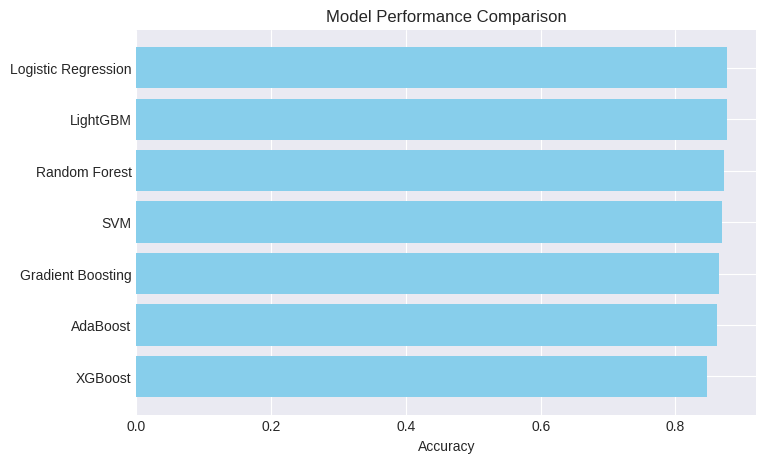

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(results_df["Model"], results_df["Accuracy"], color='skyblue')
plt.xlabel("Accuracy")
plt.title("Model Performance Comparison")
plt.gca().invert_yaxis()
plt.show()

In [41]:
print(results_df)

                 Model  Accuracy
0  Logistic Regression  0.876364
5             LightGBM  0.876364
1        Random Forest  0.872727
6                  SVM  0.869091
7                  SVM  0.869091
2    Gradient Boosting  0.865455
3             AdaBoost  0.861818
4              XGBoost  0.847273
